In [1]:
from nltk.corpus import stopwords
from textblob import TextBlob
import re
import jsonpickle
import wordcloud
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import pandas as pd

In [2]:
tweets = []
with open('tweets_kingsman.txt', 'r') as fr:
    for f in fr.readlines():
        tweets.append(jsonpickle.decode(f)['text'])

In [3]:
def clean_text(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|(www\.\S+)", " ", text).lower().split())
    stopWords = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stopWords])
    return text

In [4]:
def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [5]:
tweets_df = pd.DataFrame(tweets[0:10001], columns = ['text'])

In [6]:
tweets_df['text_clean'] = tweets_df['text'].apply(clean_text)

In [7]:
tweets_df['sentiment'] = tweets_df['text_clean'].apply(get_sentiment)

In [8]:
tweets_pos = tweets_df[tweets_df['sentiment'] == 'Positive']

In [9]:
tweets_neg = tweets_df[tweets_df['sentiment'] == 'Negative']

In [10]:
tweets_neu = tweets_df[tweets_df['sentiment'] == 'Neutral']

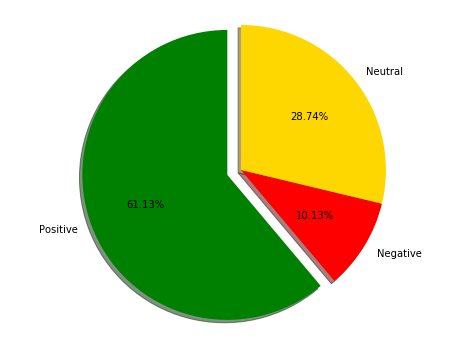

In [11]:
plt.rcParams["figure.figsize"] = [8, 6]
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(tweets_pos) / len(tweets_df), len(tweets_neg) / len(tweets_df), len(tweets_neu) / len(tweets_df)]
colors = ['green', 'red', 'gold']
explode = (0.1, 0, 0)
plt.pie(sizes, explode, labels, colors, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [12]:
movieWords = ['kingsman', 'golden', 'circle', 'secret', 'service']
filterWords = ['see', 'seeing', 'saw', 'seen', 'watch', 'watching', 'watched', 'movie', 'movies', 'film', 'films']

text_pos = []
for tweet in tweets_pos['text_clean']:
    text_pos.extend([w for w in tweet.split() if w not in movieWords + filterWords])
    
text_neg = []
for tweet in tweets_neg['text_clean']:
    text_neg.extend([w for w in tweet.split() if w not in movieWords + filterWords])


In [13]:
wc = wordcloud.WordCloud(background_color = 'white', max_font_size= 100, random_state= 30)

In [14]:
print(Counter(text_pos).most_common(20))

[('good', 809), ('new', 472), ('first', 467), ('one', 357), ('free', 305), ('fun', 268), ('great', 262), ('review', 249), ('love', 247), ('video', 232), ('action', 224), ('really', 211), ('loved', 209), ('amazing', 208), ('best', 207), ('amp', 198), ('like', 190), ('better', 184), ('liked', 179), ('go', 178)]


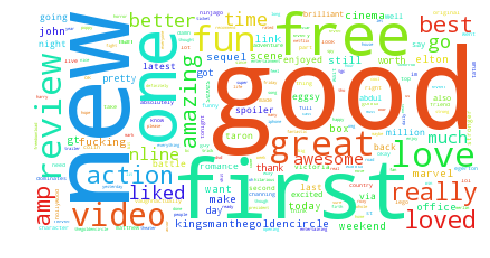

In [15]:
plt.imshow(wc.generate(' '.join(text_pos)))
plt.axis("off")
plt.show()

In [16]:
print(Counter(text_neg).most_common(20))

[('bad', 80), ('fucking', 71), ('fuck', 61), ('new', 53), ('one', 43), ('like', 41), ('amp', 38), ('hate', 38), ('expected', 34), ('less', 34), ('go', 34), ('still', 33), ('shit', 33), ('channing', 32), ('tatum', 32), ('really', 30), ('sequel', 29), ('sick', 29), ('im', 29), ('going', 29)]


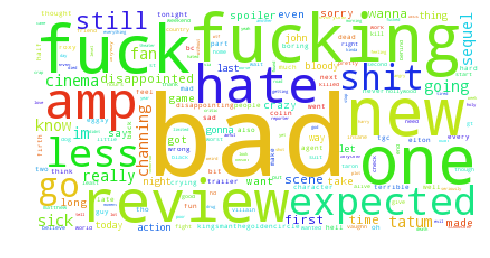

In [17]:
plt.figure(figsize = (8, 6))
plt.imshow(wc.generate(' '.join(text_neg)))
plt.axis("off")
plt.show()

In [18]:
nrcEmotionList = defaultdict(list)
nrc_file = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"

with open(nrc_file, "r", encoding = "utf-8") as fr:
    for line in fr.readlines():
        word, emotion, value = line.replace("\n", "").split("\t")
        if int(value) == 1:
            nrcEmotionList[word].append(emotion)

In [19]:
def get_nrc_sentiment(text):
    emoCount = Counter()
    for word in text.split():
        if word in nrcEmotionList:
            emoCount += Counter(nrcEmotionList[word])
    return emoCount

In [20]:
emotion_df = pd.DataFrame([get_nrc_sentiment(tweet) for tweet in tweets_df['text_clean']])
print(emotion_df.sum())

anger           1544.0
anticipation    4868.0
disgust         1342.0
fear            2341.0
joy             3131.0
negative        3051.0
positive        5505.0
sadness         1460.0
surprise        2054.0
trust           3302.0
dtype: float64


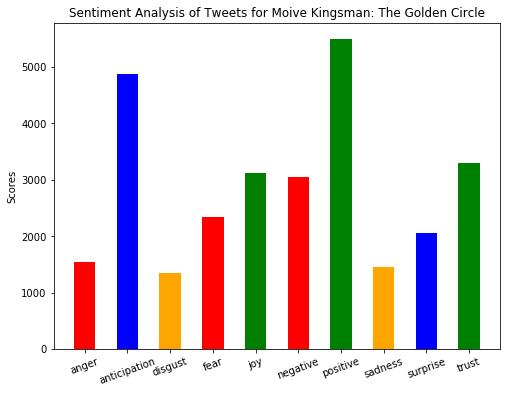

In [21]:
y = list(emotion_df.sum())
x = list(range(len(y)))
colors = ['red', 'blue', 'orange', 'red', 'green', 'red', 'green', 'orange', 'blue', 'green']
plt.bar(x, y, width = 0.5, color = colors)
plt.ylabel('Scores')
plt.xticks(x, (list(emotion_df.columns)), rotation = 20)
plt.title('Sentiment Analysis of Tweets for Moive Kingsman: The Golden Circle')
plt.show()